In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
import matplotlib
import matplotlib.pyplot as plt
import pandas
import numpy as np
import json
import requests

In [2]:
spark = SparkSession.builder.getOrCreate()
df = spark.read.json('2021-04-15-12.json')
df.createOrReplaceTempView("events") # Create SQL table "events"
df.printSchema()

root
 |-- actor: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- display_login: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- id: string (nullable = true)
 |-- org: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)
 |-- payload: struct (nullable = true)
 |    |-- action: string (nullable = true)
 |    |-- before: string (nullable = true)
 |    |-- comment: struct (nullable = true)
 |    |    |-- _links: struct (nullable = true)
 |    |    |    |-- html: struct (nullable = true)
 |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- pull_request: struct (nul

In [3]:
# Print total events by type
total_evts = spark.sql("SELECT COUNT(*) as count FROM events")
total_evts.show(truncate=False)
count_evts = spark.sql("SELECT type, COUNT(*) AS count FROM events GROUP BY type")
count_evts.show(truncate=False)

+------+
|count |
+------+
|154260|
+------+

+-----------------------------+-----+
|type                         |count|
+-----------------------------+-----+
|PullRequestReviewEvent       |5500 |
|PushEvent                    |81608|
|GollumEvent                  |494  |
|ReleaseEvent                 |952  |
|CommitCommentEvent           |636  |
|CreateEvent                  |20019|
|PullRequestReviewCommentEvent|3661 |
|IssueCommentEvent            |9316 |
|DeleteEvent                  |4926 |
|IssuesEvent                  |3955 |
|ForkEvent                    |2779 |
|PublicEvent                  |451  |
|MemberEvent                  |612  |
|WatchEvent                   |8103 |
|PullRequestEvent             |11248|
+-----------------------------+-----+



                               count
type                                
PullRequestReviewEvent          5500
PushEvent                      81608
GollumEvent                      494
ReleaseEvent                     952
CommitCommentEvent               636
CreateEvent                    20019
PullRequestReviewCommentEvent   3661
IssueCommentEvent               9316
DeleteEvent                     4926
IssuesEvent                     3955
ForkEvent                       2779
PublicEvent                      451
MemberEvent                      612
WatchEvent                      8103
PullRequestEvent               11248


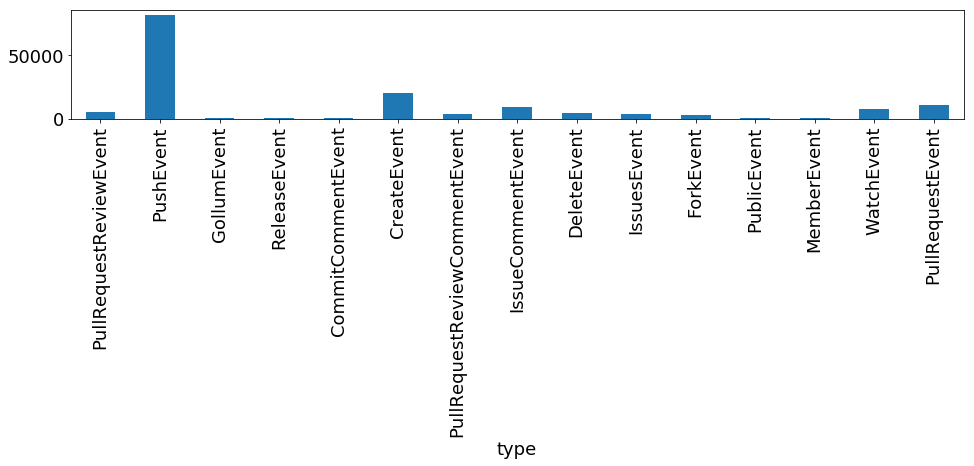

In [27]:
# Plot the event counts
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(16, 2))
pd = count_evts.toPandas()
pd = pd.set_index('type')
pd.plot(kind='bar', ax=ax) 
ax.get_legend().remove()
print(pd)